#  Introdução

A extração de dados do Twitter pode ser uma ferramenta valiosa para as empresas públicas que buscam compreender melhor o sentimento e as necessidades dos cidadãos. Com bilhões de tweets sendo publicados diariamente, o Twitter oferece uma riqueza de informações que as empresas públicas podem usar para melhorar a visão e o objetivo da empresa para a sociedade.


Importando as Bibliotecas necessárias para a extração dos dados, tratamento dos dados, análise dos dados e treinamento de modelos

In [1]:
!pip3 install tweepy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install nltk
import nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install wordcloud
from wordcloud import WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import tweepy
import numpy as np
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes             import MultinomialNB
from sklearn                         import metrics
from sklearn.model_selection         import cross_val_predict
from sklearn.ensemble                import RandomForestClassifier
from google.colab                    import drive
from nltk.corpus                     import stopwords
nltk.download('punkt')
from nltk.tokenize                   import word_tokenize
import nltk
nltk.download('vader_lexicon')
from collections import Counter
from nltk.tag import pos_tag

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


# Chave de acesso para extração de dados via API do Twitter


In [5]:
#Chave
bearer_token = "AAAAAAAAAAAAAAAAAAAAAGJrlgEAAAAAbwqHxRmdRHG1qqeZTzx7OrESAig%3D4QiKcBbjpuEmOXMRala40QU0D2QSEWEPIVyIRKcjlG29JDgACA"

client = tweepy.Client(bearer_token=bearer_token)

In [6]:
df2 = pd.DataFrame(columns=['ID', 'text'])

Método usado para extração dos dados do Twitter

In [7]:
public_tweets = tweepy.Paginator(client.search_recent_tweets, query='eletrobras', 
                              max_results=100).flatten(limit=2000)

In [8]:
analysis = None

In [9]:
count = 0
for tweet in public_tweets:
  analysis = TextBlob(tweet.text)
  
  df2.loc[count] = [tweet.id]+[tweet.text]
  
  count += 1

In [10]:
df2.head(100)

,ID,text
0,1637984794729488386,"Orgulho de completar mais um ano em Furnas , #..."
1,1637984618568728576,Estatais perderam R$ 67 bilhões em valor de me...
2,1637984374401519616,TCU recomenda que governo avalie possibilidade...
3,1637984038328717312,Lula diz que vai pedir revisão do contrato de ...
4,1637983832660926465,Eletrobras anuncia processo seletivo para 832 ...
...,...,...
95,1637950848864079874,@Bradesco Não faço ideia seno Fundo Eletrobras...
96,1637950148692115457,RT @SalveAEnergia: Pela retomada da Eletrobras...
97,1637950110649958400,RT @kakahmenina: Eletricitários defendem criaç...
98,1637949601524203521,RT @A_MelhorNoticia: 🇧🇷 Brasil:\nJanja é soció...


Expressão regular para remover toda a pontuação

In [11]:
# Essa expressão regular remove toda a pontuação
punc_re = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
df2['text'] = df2.text.map(punc_re)

Expressão Regular para remoção de palavras com números e colocar as palavras em minúsculas

In [12]:
# Essa expressão regular remove todas as palavras com números e também torna todas as palavras em minúsculas
lower_alpha = lambda x: re.sub(r"""\w*\d\w*""", ' ', x.lower())
df2['text'] = df2.text.map(lower_alpha)

Tokenização

In [13]:
#faz uso do nltk.download('punkt')
#from nltk.tokenize import word_tokenize

df2['tokens'] = df2.text.map(word_tokenize)
df2.head()

,ID,text,tokens
0,1637984794729488386,orgulho de completar mais um ano em furnas ...,"[orgulho, de, completar, mais, um, ano, em, fu..."
1,1637984618568728576,estatais perderam r bilhões em valor de mer...,"[estatais, perderam, r, bilhões, em, valor, de..."
2,1637984374401519616,tcu recomenda que governo avalie possibilidade...,"[tcu, recomenda, que, governo, avalie, possibi..."
3,1637984038328717312,lula diz que vai pedir revisão do contrato de ...,"[lula, diz, que, vai, pedir, revisão, do, cont..."
4,1637983832660926465,eletrobras anuncia processo seletivo para va...,"[eletrobras, anuncia, processo, seletivo, para..."


# Análise de Sentimento

In [14]:
from nltk.sentiment import SentimentIntensityAnalyzer


In [15]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [16]:
from nltk.tokenize import TweetTokenizer


In [17]:
sia = SentimentIntensityAnalyzer()

In [18]:
def analisar_sentimento2(texto):
    tokens = TweetTokenizer(texto)
    score = sia.polarity_scores(texto)
    return score['compound']


In [19]:
df2['Pontuacao2'] = df2['text'].apply(analisar_sentimento2)

In [20]:
df2.head(16)

,ID,text,tokens,Pontuacao2
0,1637984794729488386,orgulho de completar mais um ano em furnas ...,"[orgulho, de, completar, mais, um, ano, em, fu...",0.4767
1,1637984618568728576,estatais perderam r bilhões em valor de mer...,"[estatais, perderam, r, bilhões, em, valor, de...",-0.3182
2,1637984374401519616,tcu recomenda que governo avalie possibilidade...,"[tcu, recomenda, que, governo, avalie, possibi...",-0.6249
3,1637984038328717312,lula diz que vai pedir revisão do contrato de ...,"[lula, diz, que, vai, pedir, revisão, do, cont...",0.4404
4,1637983832660926465,eletrobras anuncia processo seletivo para va...,"[eletrobras, anuncia, processo, seletivo, para...",-0.6486
5,1637983708463480832,rt a melhornoticia 🇧🇷 brasil \njanja é soció...,"[rt, a, melhornoticia, 🇧🇷, brasil, janja, é, s...",0.0000
6,1637983430607511552,senadorhumberto vc fez o l para a mentira a ...,"[senadorhumberto, vc, fez, o, l, para, a, ment...",0.0000
7,1637983390732263424,rt a melhornoticia 🇧🇷 brasil \njanja é soció...,"[rt, a, melhornoticia, 🇧🇷, brasil, janja, é, s...",0.0000
8,1637981962441728001,rt jucones ivanvalente reestatização da ...,"[rt, jucones, ivanvalente, reestatização, da, ...",0.0000
9,1637981917659234304,rt carrancaenergia ivanvalente valorizou...,"[rt, carrancaenergia, ivanvalente, valorizou, ...",0.0000


Função para rotular os resultados obtidos pela Pontuação

In [21]:
# Define uma função de mapeamento
def mapear_valor(valor):
    if valor > 0:
        return 'Positivo'
    elif valor < 0:
        return 'Negativo'
    else:
        return 'Neutro'


In [22]:
df2['Pontuacao2'] = df2['Pontuacao2'].astype(float)

In [23]:
df2.head()

,ID,text,tokens,Pontuacao2
0,1637984794729488386,orgulho de completar mais um ano em furnas ...,"[orgulho, de, completar, mais, um, ano, em, fu...",0.4767
1,1637984618568728576,estatais perderam r bilhões em valor de mer...,"[estatais, perderam, r, bilhões, em, valor, de...",-0.3182
2,1637984374401519616,tcu recomenda que governo avalie possibilidade...,"[tcu, recomenda, que, governo, avalie, possibi...",-0.6249
3,1637984038328717312,lula diz que vai pedir revisão do contrato de ...,"[lula, diz, que, vai, pedir, revisão, do, cont...",0.4404
4,1637983832660926465,eletrobras anuncia processo seletivo para va...,"[eletrobras, anuncia, processo, seletivo, para...",-0.6486


In [24]:
df2['rotulos'] = df2['Pontuacao2'].apply(mapear_valor)

In [25]:
df2.head()

,ID,text,tokens,Pontuacao2,rotulos
0,1637984794729488386,orgulho de completar mais um ano em furnas ...,"[orgulho, de, completar, mais, um, ano, em, fu...",0.4767,Positivo
1,1637984618568728576,estatais perderam r bilhões em valor de mer...,"[estatais, perderam, r, bilhões, em, valor, de...",-0.3182,Negativo
2,1637984374401519616,tcu recomenda que governo avalie possibilidade...,"[tcu, recomenda, que, governo, avalie, possibi...",-0.6249,Negativo
3,1637984038328717312,lula diz que vai pedir revisão do contrato de ...,"[lula, diz, que, vai, pedir, revisão, do, cont...",0.4404,Positivo
4,1637983832660926465,eletrobras anuncia processo seletivo para va...,"[eletrobras, anuncia, processo, seletivo, para...",-0.6486,Negativo


In [26]:
df2.iloc[4]

ID                                          1637983832660926465
text          eletrobras anuncia processo seletivo para   va...
tokens        [eletrobras, anuncia, processo, seletivo, para...
Pontuacao2                                              -0.6486
rotulos                                                Negativo
Name: 4, dtype: object

In [27]:
df2.head()

,ID,text,tokens,Pontuacao2,rotulos
0,1637984794729488386,orgulho de completar mais um ano em furnas ...,"[orgulho, de, completar, mais, um, ano, em, fu...",0.4767,Positivo
1,1637984618568728576,estatais perderam r bilhões em valor de mer...,"[estatais, perderam, r, bilhões, em, valor, de...",-0.3182,Negativo
2,1637984374401519616,tcu recomenda que governo avalie possibilidade...,"[tcu, recomenda, que, governo, avalie, possibi...",-0.6249,Negativo
3,1637984038328717312,lula diz que vai pedir revisão do contrato de ...,"[lula, diz, que, vai, pedir, revisão, do, cont...",0.4404,Positivo
4,1637983832660926465,eletrobras anuncia processo seletivo para va...,"[eletrobras, anuncia, processo, seletivo, para...",-0.6486,Negativo


In [28]:
# Isso cria uma lista enorme combinando todos os valores de tokens
word_list = sum(df2.tokens.tolist(), [])

word_list[:10]

['orgulho',
 'de',
 'completar',
 'mais',
 'um',
 'ano',
 'em',
 'furnas',
 'eletrobras',
 'publica']

In [29]:
# Estas são as etapas para encontrar as palavras mais comuns

#from collections import Counter

# Converte a lista em um dicionário com contagem de valores
word_counts = Counter(word_list)

# Inverter a chave / valores no dicionário para classificarReverter a chave / valores no dicionário para classificar
word_counts = list(zip(word_counts.values(), word_counts.keys()))

# Classifique a lista por contagem
word_counts = sorted(word_counts, reverse=True)

# Imprime as 10 palavras mais comuns
word_counts[:10]

[(2618, 'a'),
 (2557, 'e'),
 (2222, 'na'),
 (2032, 'já'),
 (1711, 'eletrobras'),
 (1683, 'rt'),
 (1193, 'é'),
 (1139, 'brasil'),
 (1123, 'foi'),
 (1024, 'da')]

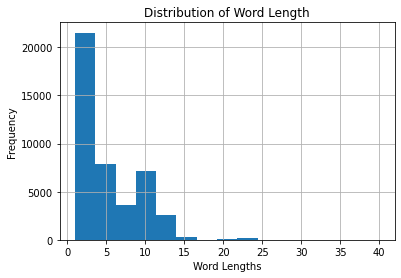

In [30]:
# A distribuição dos comprimentos das palavras
word_lengths = pd.Series([len(x) for x in word_list])

ax = word_lengths.hist(bins=15)
ax.set(xlabel='Word Lengths', ylabel='Frequency', title='Distribution of Word Length');

In [31]:
word_counts[:10]

[(2618, 'a'),
 (2557, 'e'),
 (2222, 'na'),
 (2032, 'já'),
 (1711, 'eletrobras'),
 (1683, 'rt'),
 (1193, 'é'),
 (1139, 'brasil'),
 (1123, 'foi'),
 (1024, 'da')]

Uso de Stopwords para extração de palavras úteis na Wordcloud

In [32]:
# Remova as stop words
from nltk.corpus import stopwords
nltk.download("stopwords")

stop_words = stopwords.words('portuguese')
stop_words.append('co')
stop_words.append('t')
stop_words.append('https')
stop_words.append('rt')
stop_words.append('a')
stop_words.append('e')
stop_words.append('o')
stop_words.append('de')
stop_words.append('com')

stop_lambda = lambda x: [y for y in x if y not in stop_words]
df2['tokens_stop'] = df2.tokens.apply(stop_lambda)
df2.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,ID,text,tokens,Pontuacao2,rotulos,tokens_stop
0,1637984794729488386,orgulho de completar mais um ano em furnas ...,"[orgulho, de, completar, mais, um, ano, em, fu...",0.4767,Positivo,"[orgulho, completar, ano, furnas, eletrobras, ..."
1,1637984618568728576,estatais perderam r bilhões em valor de mer...,"[estatais, perderam, r, bilhões, em, valor, de...",-0.3182,Negativo,"[estatais, perderam, r, bilhões, valor, mercad..."
2,1637984374401519616,tcu recomenda que governo avalie possibilidade...,"[tcu, recomenda, que, governo, avalie, possibi...",-0.6249,Negativo,"[tcu, recomenda, governo, avalie, possibilidad..."
3,1637984038328717312,lula diz que vai pedir revisão do contrato de ...,"[lula, diz, que, vai, pedir, revisão, do, cont...",0.4404,Positivo,"[lula, diz, vai, pedir, revisão, contrato, pri..."
4,1637983832660926465,eletrobras anuncia processo seletivo para va...,"[eletrobras, anuncia, processo, seletivo, para...",-0.6486,Negativo,"[eletrobras, anuncia, processo, seletivo, vaga..."


In [33]:
word_list_stop = sum(df2.tokens_stop.tolist(), [])

In [34]:
word_list_stop[:10]

['orgulho',
 'completar',
 'ano',
 'furnas',
 'eletrobras',
 'publica',
 'proud',
 'estatais',
 'perderam',
 'r']

In [35]:
# partes de speech tagging
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')
pos_lambda = lambda x: nltk.pos_tag(x)
df2['tokens_pos'] = (df2.tokens_stop.apply(pos_lambda))
df2.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,ID,text,tokens,Pontuacao2,rotulos,tokens_stop,tokens_pos
0,1637984794729488386,orgulho de completar mais um ano em furnas ...,"[orgulho, de, completar, mais, um, ano, em, fu...",0.4767,Positivo,"[orgulho, completar, ano, furnas, eletrobras, ...","[(orgulho, JJ), (completar, NN), (ano, NN), (f..."
1,1637984618568728576,estatais perderam r bilhões em valor de mer...,"[estatais, perderam, r, bilhões, em, valor, de...",-0.3182,Negativo,"[estatais, perderam, r, bilhões, valor, mercad...","[(estatais, NN), (perderam, NN), (r, NN), (bil..."
2,1637984374401519616,tcu recomenda que governo avalie possibilidade...,"[tcu, recomenda, que, governo, avalie, possibi...",-0.6249,Negativo,"[tcu, recomenda, governo, avalie, possibilidad...","[(tcu, NN), (recomenda, NN), (governo, NN), (a..."
3,1637984038328717312,lula diz que vai pedir revisão do contrato de ...,"[lula, diz, que, vai, pedir, revisão, do, cont...",0.4404,Positivo,"[lula, diz, vai, pedir, revisão, contrato, pri...","[(lula, NN), (diz, NN), (vai, NN), (pedir, NN)..."
4,1637983832660926465,eletrobras anuncia processo seletivo para va...,"[eletrobras, anuncia, processo, seletivo, para...",-0.6486,Negativo,"[eletrobras, anuncia, processo, seletivo, vaga...","[(eletrobras, NNS), (anuncia, VBP), (processo,..."


In [36]:
from collections import Counter

# Converte a lista em um dicionário com contagem de valores (usando o stop)
word_counts_stop = Counter(word_list_stop)
a = word_counts_stop

# Inverta a chave / valores no dicionário para classificar
word_counts_stop = list(zip(word_counts_stop.values(), word_counts_stop.keys()))

# Classifique a lista por contagem
word_counts_stop = sorted(word_counts_stop, reverse=True)

# Imprime as 10 palavras mais comuns
word_counts_stop[:10]

[(1711, 'eletrobras'),
 (1139, 'brasil'),
 (1010, 'itaipu'),
 (984, 'melhornoticia'),
 (983, 'trabalhou'),
 (976, '🇧🇷'),
 (972, 'socióloga'),
 (969, 'janja'),
 (968, 'professora'),
 (964, 'universitária')]

Nuvem de Palavras 

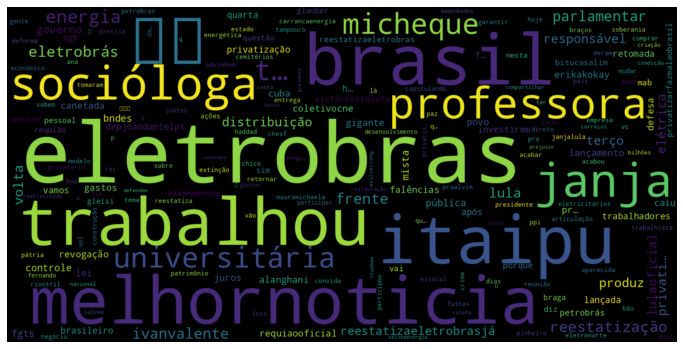

In [37]:
text = word_list_stop
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).fit_words(a)
# wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Extração de dados em um excel

In [38]:
file_name = 'Basededados_twitter_eletrobras.xlsx'
df2.to_excel(file_name)

# Modelagem

In [39]:
comentarios = df2["text"].values
comentarios

array(['orgulho de completar mais um ano em furnas    eletrobras  publica  proud',
       'estatais perderam r    bilhões em valor de mercado desde as eleições  mas ibovespa acumula alta  inclusive perdas na eletrobrás  lost',
       'tcu recomenda que governo avalie possibilidade de não contratar térmicas impostas por lei da eletrobras\n  worst',
       ...,
       'rt  ivanvalente  a eletrobras produz um terço da energia elétrica do brasil e é responsável por    da distribuição de energia  foi privati…',
       'rt  a melhornoticia  🇧🇷 brasil \njanja é socióloga  já foi professora universitária  já trabalhou na itaipu e na eletrobras  e a micheque  t…',
       'rt  a melhornoticia  🇧🇷 brasil \njanja é socióloga  já foi professora universitária  já trabalhou na itaipu e na eletrobras  e a micheque  t…'],
      dtype=object)

In [40]:
classes = df2["rotulos"].values
classes

array(['Positivo', 'Negativo', 'Negativo', ..., 'Neutro', 'Neutro',
       'Neutro'], dtype=object)

Multinomial

In [41]:
vectorizer = CountVectorizer(analyzer = "word")
freq_comentarios = vectorizer.fit_transform(comentarios)
modelo = MultinomialNB()
modelo.fit(freq_comentarios, classes)



MultinomialNB()

In [43]:
resultados = cross_val_predict(modelo, freq_comentarios, classes, cv = 10)
resultados

array(['Negativo', 'Negativo', 'Negativo', ..., 'Neutro', 'Neutro',
       'Neutro'], dtype='<U8')

In [44]:
metrics.accuracy_score(classes, resultados)

0.9065

In [45]:
##sentimentos = ["positivo","neutro","negativo"]

In [46]:
print(metrics.classification_report(classes, resultados))

              precision    recall  f1-score   support

    Negativo       0.32      0.98      0.49        87
      Neutro       1.00      0.91      0.95      1903
    Positivo       0.29      0.20      0.24        10

    accuracy                           0.91      2000
   macro avg       0.54      0.69      0.56      2000
weighted avg       0.96      0.91      0.93      2000



In [47]:
print(pd.crosstab(classes, resultados, rownames = ["Real"], colnames=["Predito"], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo        85       2         0    87
Neutro         172    1726         5  1903
Positivo         6       2         2    10
All            263    1730         7  2000


Multinomial usando Bigramas

In [48]:
#usando melhoria com Bigrams
vectorizer = CountVectorizer(ngram_range = (1, 2))
freq_comentarios = vectorizer.fit_transform(comentarios)

modelo = MultinomialNB()
modelo.fit(freq_comentarios, classes)

MultinomialNB()

In [49]:
resultados = cross_val_predict(modelo, freq_comentarios, classes, cv = 10)
resultados

array(['Negativo', 'Positivo', 'Negativo', ..., 'Neutro', 'Neutro',
       'Neutro'], dtype='<U8')

In [50]:
metrics.accuracy_score(classes, resultados)

0.874

In [51]:
print(metrics.classification_report(classes, resultados))

              precision    recall  f1-score   support

    Negativo       0.27      0.92      0.42        87
      Neutro       1.00      0.87      0.93      1903
    Positivo       0.08      0.30      0.12        10

    accuracy                           0.87      2000
   macro avg       0.45      0.70      0.49      2000
weighted avg       0.96      0.87      0.91      2000



 Modelo Randow Forest

In [52]:
vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None,stop_words = stop_words, max_features = 5000)

In [53]:
train_data_features = vectorizer.fit_transform(comentarios)
train_data_features

<2000x1940 sparse matrix of type '<class 'numpy.int64'>'
	with 21034 stored elements in Compressed Sparse Row format>

In [54]:
forest = RandomForestClassifier(n_estimators = 100)
forest

RandomForestClassifier()

In [55]:
class_sentimentos = df2["rotulos"].values
class_sentimentos

array(['Positivo', 'Negativo', 'Negativo', ..., 'Neutro', 'Neutro',
       'Neutro'], dtype=object)

In [56]:
forest = forest.fit(train_data_features, class_sentimentos)
forest

RandomForestClassifier()

In [57]:
test_data_features_resultados = vectorizer.transform(comentarios)
test_data_features_resultados

<2000x1940 sparse matrix of type '<class 'numpy.int64'>'
	with 21034 stored elements in Compressed Sparse Row format>

In [58]:
resultados = forest.predict(test_data_features_resultados)
resultados

array(['Positivo', 'Negativo', 'Negativo', ..., 'Neutro', 'Neutro',
       'Neutro'], dtype=object)

In [59]:
metrics.accuracy_score(classes, resultados)

1.0

In [60]:
print(metrics.classification_report(classes, resultados))

              precision    recall  f1-score   support

    Negativo       1.00      1.00      1.00        87
      Neutro       1.00      1.00      1.00      1903
    Positivo       1.00      1.00      1.00        10

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [61]:
print(pd.crosstab(classes, resultados, rownames = ["Real"], colnames = ["Predito"], margins = True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo        87       0         0    87
Neutro           0    1903         0  1903
Positivo         0       0        10    10
All             87    1903        10  2000
